In [ ]:
import numpy as np

In [42]:
def init(layersize):
    param={}
   

    for L in range(1,len(layersize)):
        param[f'w{L}']=np.random.randn(layersize[L],layersize[L-1]) * 0.01
        param[f'b{L}']=np.zeros((layersize[L],1))
    return param 

In [50]:
def softmax(Z):
    expz=np.exp(Z-np.max(Z,axis=0,keepdims=True))
    return expz/np.sum(expz,axis=0,keepdims=True)




In [3]:
def relu(Z):
    return np.maximum(0,Z)

In [6]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [66]:
def forward(X,param):

    L=len(param)//2
    activ={
        'a0':X
    }

    for l in range(1,L):
        Z=np.dot(param[f'w{l}'] , activ[f'a{l-1}'])+param[f'b{l}']
        a=relu(Z)
        activ[f'z{l}']=Z
        activ[f'a{l}']=a

    ZL = np.dot(param[f'w{L}'], activ[f'a{L-1}']) + param[f'b{L}']
    activ[f'z{L}'] = ZL  
    activ[f'a{L}'] = softmax(ZL) 

    return activ

In [63]:
def relu_deriv(a):
    return (a > 0).astype(float)

In [67]:
def back_prop(param,activ,Y):
    L=len(param)//2
    grads={}
    m=Y.shape[1]
    dz=activ[f'a{L}']-Y
    grads[f'dz{L}'] = dz
    grads[f'dw{L}']=1/m* np.dot(dz,activ[f'a{L-1}'].T)
    grads[f"db{L}"] = (1 / m) * np.sum(dz, axis=1, keepdims=True)
    for l in reversed(range(1,L)):
        w_next=param[f'w{l+1}']
        dz_next=grads[f'dz{l+1}']

        grads[f'dz{l}']=np.dot(w_next.T,dz_next)*relu_deriv(activ[f'a{l}']) #activ[f'a{l}']*(1-activ[f'a{l}']) derivative of the sigmoid s(x)*(1-S(x))
        grads[f'dw{l}']=(1/m)*np.dot(grads[f'dz{l}'],activ[f'a{l-1}'].T)
        grads[f'db{l}']=(1/m)*np.sum(grads[f'dz{l}'],axis=1,keepdims=True)
    return grads 
    

In [65]:
def update(para,gradients,lr):
    L=len(para)//2
    for l in range(1,L+1):
        para[f'w{l}']-=lr*gradients[f'dw{l}'] 
        para[f'b{l}']-=lr*gradients[f'db{l}']
    return para

In [10]:
def predict(X,para):
    activ=forward(X,para)
    L=len(para)//2
    return np.argmax(activ[f'a{L}'],axis=0)


In [11]:
def loss(AL, Y):
    m = Y.shape[1]
    return -np.sum(Y * np.log(AL + 1e-8)) / m


In [75]:
def train(X,Y,sizes,lr=0.01,iter=2000):
     param=init(sizes)
     cost=[]
    
     for i in range(iter):
           
            activ=forward(X,param)

            err=loss(activ[f'a{len(sizes)-1}'], Y)
            grads=back_prop(param,activ,Y)
            cost.append(err)
            param=update(param,grads,lr)
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss(activ[f'a{len(sizes)-1}'], Y)}")
     return param      

In [38]:

def one_hot(Y, num_classes):
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

In [97]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Normalize the data
X = X / 255.0  # Convert X to numpy and normalize


# Convert labels to integers and apply one-hot encoding
y = y.astype(int)

Y = one_hot(y.to_numpy(), 10)  # Apply one-hot encoding

# Train the model using first 1000 samples
parameters = train(X[:5000].T, Y[:, :5000], sizes=[784, 128, 64, 10], lr=0.1,iter=5000)





Epoch 0, Loss: 2.3025836309234635
Epoch 100, Loss: 2.299350361046551
Epoch 200, Loss: 2.2959369220376296
Epoch 300, Loss: 2.235430173373301
Epoch 400, Loss: 1.1004974958026725
Epoch 500, Loss: 0.6404244586535693
Epoch 600, Loss: 0.539512780370786
Epoch 700, Loss: 0.49160049240515347
Epoch 800, Loss: 0.4207098474950601
Epoch 900, Loss: 0.3591931326015907
Epoch 1000, Loss: 0.31163970206496483
Epoch 1100, Loss: 0.2748252213140955
Epoch 1200, Loss: 0.24376417063099828
Epoch 1300, Loss: 0.21634247455359154
Epoch 1400, Loss: 0.19166586965703034
Epoch 1500, Loss: 0.16932487357602635
Epoch 1600, Loss: 0.1493122449614927
Epoch 1700, Loss: 0.13131194284887307
Epoch 1800, Loss: 0.11532817045133345
Epoch 1900, Loss: 0.10103691094621813
Epoch 2000, Loss: 0.08821236262065377
Epoch 2100, Loss: 0.07687046712592581
Epoch 2200, Loss: 0.0669180259810258
Epoch 2300, Loss: 0.05834822051261104
Epoch 2400, Loss: 0.051030301940082325
Epoch 2500, Loss: 0.04478330131961429
Epoch 2600, Loss: 0.03940656553715944


In [98]:
outputs = forward(X[6000:6100].T, parameters)['a' + str(len(parameters)//2)]
preds = np.argmax(outputs, axis=0)

# Calculate accuracy
accuracy = np.mean(preds == y[6000:6100]) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 95.00%


<>:32: SyntaxWarning: invalid escape sequence '\i'
<>:32: SyntaxWarning: invalid escape sequence '\i'
C:\Users\USER\AppData\Local\Temp\ipykernel_7580\1000900171.py:32: SyntaxWarning: invalid escape sequence '\i'
  img_vector = preprocess_image('images\im3.jpeg')


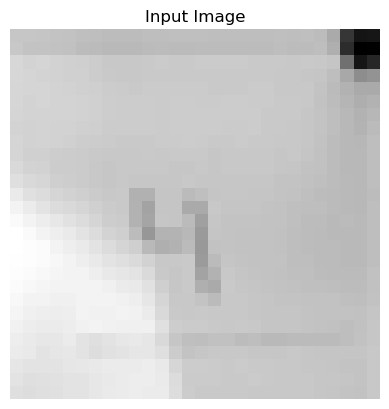

Predicted digit: [3]


In [103]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(path):
  
    img = Image.open(path).convert('L')  

    # Resize to 28x28
    img = img.resize((28, 28))
     
  
    img_array = np.array(img)


    plt.imshow(img_array, cmap='gray')
    plt.title("Input Image")
    plt.axis("off")
    plt.show()

    if img_array.mean() > 127:  
        img_array = 255 - img_array 

    # Normalize pixel values
    img_array = img_array / 255.0

    img_vector = img_array.reshape(784, 1)

    return img_vector


img_vector = preprocess_image('images\im3.jpeg')
pred = predict(img_vector, parameters)
print(f"Predicted digit: {pred}")

In [104]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(parameters, file)
